In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

In [2]:
df=pd.read_csv("C:/Users/91700/Bangalore House Prediction/Bengaluru_House_Data.csv")

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


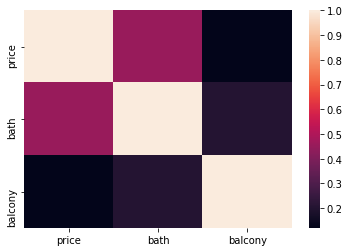

In [4]:
sns.heatmap(df[['price','bath','balcony']].corr())

In [5]:
cor=df.corr().abs().unstack().sort_values(ascending=False).drop_duplicates()
cor

price    price      1.000000
         bath       0.456345
balcony  bath       0.204201
price    balcony    0.120355
dtype: float64

In [6]:
#drop the cloumns that are not needed to build the model.
df2=df.drop(['availability','area_type', 'society'], axis=1)
df2.shape

(13320, 6)

In [7]:
df2.drop_duplicates()
df2.shape

(13320, 6)

In [8]:
df2.describe(include='all')

,location,size,total_sqft,bath,balcony,price
count,13319,13304,13320,13247.000000,12711.000000,13320.000000
unique,1305,31,2117,NaN,NaN,NaN
top,Whitefield,2 BHK,1200,NaN,NaN,NaN
freq,540,5199,843,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.692610,1.584376,112.565627
std,NaN,NaN,NaN,1.341458,0.817263,148.971674
min,NaN,NaN,NaN,1.000000,0.000000,8.000000
25%,NaN,NaN,NaN,2.000000,1.000000,50.000000
50%,NaN,NaN,NaN,2.000000,2.000000,72.000000
75%,NaN,NaN,NaN,3.000000,2.000000,120.000000


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   balcony     12711 non-null  float64
 5   price       13320 non-null  float64
dtypes: float64(3), object(3)
memory usage: 624.5+ KB


In [10]:
def valuecounts(df):
    for col in df.columns:
        print(df[col].value_counts())
        print("********************************************")
        
    

In [11]:
valuecounts(df2)

Whitefield                 540
Sarjapur  Road             399
Electronic City            302
Kanakpura Road             273
Thanisandra                234
                          ... 
Chellikere                   1
Kenchanehalli R R Nagar      1
Double Road                  1
Sir M V Nagar                1
Virgonagar                   1
Name: location, Length: 1305, dtype: int64
********************************************
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 Bedroom       2
11 BHK           2
10 BHK           2
19 BHK           1
13 BHK           1
16 BHK           1
43 Bedroom       1
27 BHK           1
18 Bedroom       1
14 BHK           1
1

### Data cleaning

In [12]:
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [13]:
df2.isnull().mean()*100

location      0.007508
size          0.120120
total_sqft    0.000000
bath          0.548048
balcony       4.572072
price         0.000000
dtype: float64

In [14]:
#Filling missing values in balcony with zero
df2.balcony=df2.balcony.fillna(0)

In [15]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
balcony        0
price          0
dtype: int64

In [16]:
#dropping remaining rows
df3=df2.dropna()

In [17]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [18]:
pd.set_option("display.max_columns", None)

In [19]:
pd.set_option("display.max_rows", None)

In [20]:
df4=df3.copy()

### Feature engineering


In [21]:
#Handeling location(removing inconsistent entries and Dimentionality reduction)
loc=df4['location'].unique()
loc.sort()
loc

array([' Anekal', ' Banaswadi', ' Basavangudi', ..., 'vinayakanagar',
       'white field,kadugodi', 'whitefiled'], dtype=object)

In [22]:
df4['location']=df4['location'].str.lower()
df4['location']=df4['location'].str.strip()

In [23]:
loc=df4['location'].unique()
loc.sort()
loc

array(['1 annasandrapalya', '1 giri nagar', '1 immadihalli', ...,
       'yeshwanthpur', 'yeshwanthpur industrial suburb', 'zuzuvadi'],
      dtype=object)

In [24]:
import fuzzywuzzy
from fuzzywuzzy import process
import chardet
matches = fuzzywuzzy.process.extract("whitefield", df4['location'].unique(),limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
matches
#Since a lot of entries are inconsistent.

C:\ProgramData\Anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


[('whitefield', 100),
 ('whitefield,', 100),
 ('whitefiled', 90),
 ('whietfield,', 90),
 ('ecc road, whitefield,', 69),
 ('whitefield ecc road', 69),
 ('epip area, whitefield', 67),
 ('brookefield', 57),
 ('itpl', 43),
 ('wheelers road', 43)]

In [25]:
def replace(df, column, string_to_match, min_ratio =90 ):
    strings = df[column].unique()
    matches = fuzzywuzzy.process.extract(string_to_match, strings,limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]
    rows_with_matches = df[column].isin(close_matches) 
    df.loc[rows_with_matches, column] = string_to_match

In [26]:
df4['location'].value_counts()

whitefield                                            535
sarjapur  road                                        392
electronic city                                       304
kanakpura road                                        266
thanisandra                                           236
yelahanka                                             210
uttarahalli                                           186
hebbal                                                176
marathahalli                                          175
raja rajeshwari nagar                                 171
bannerghatta road                                     152
hennur road                                           150
7th phase jp nagar                                    149
haralur road                                          141
electronic city phase ii                              131
rajaji nagar                                          106
chandapura                                             98
bellandur     

In [27]:
len(df4['location'].value_counts())

1282

In [28]:
df_value_counts=df4.location.value_counts()
done=[]
for string in df4['location'].unique():
    top='jogupalya'  # having the lowest count
    matches = fuzzywuzzy.process.extract(string, df4['location'].unique(),limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
    close_matches = [matches[0] for matches in matches if matches[1] >= 90]
    for match in close_matches:
        if int(df_value_counts[match])>=int(df_value_counts[top]):
            top=match 
    if top not in done:
        done.append(top)
        replace(df4,'location',top)


In [29]:
df4['location'].value_counts()

whitefield                                            539
sarjapur  road                                        400
7th phase jp nagar                                    321
electronic city                                       304
kanakpura road                                        270
thanisandra                                           236
yelahanka                                             210
uttarahalli                                           186
raja rajeshwari nagar                                 180
hebbal                                                176
marathahalli                                          175
bannerghatta road                                     152
hennur road                                           150
haralur road                                          142
electronic city phase ii                              131
rajaji nagar                                          106
chandapura                                             98
bellandur     

In [30]:
len(df4.location.value_counts())
#WE can see a decrease in the values.

1113

In [31]:
df4['location'].value_counts().to_csv("Locations.csv")

In [32]:
#more feature reduction
len(df4.location.value_counts()[df4.location.value_counts()>=10])

246

In [33]:
#selecting only value counts>=10
values_less_than_10= df4.location.value_counts()[df4.location.value_counts()<10]
len(values_less_than_10)

867

In [34]:
df4.location=df4.location.apply(lambda x: "other" if x in values_less_than_10 else x)

In [35]:
len(df4.location.unique())

247

In [36]:
#creating a new variable bhk from size
df4['size'].value_counts()

2 BHK         5198
3 BHK         4286
4 Bedroom      818
4 BHK          577
3 Bedroom      546
1 BHK          531
2 Bedroom      329
5 Bedroom      296
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           57
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 Bedroom       2
11 BHK           2
10 BHK           2
19 BHK           1
13 BHK           1
16 BHK           1
43 Bedroom       1
27 BHK           1
18 Bedroom       1
14 BHK           1
12 Bedroom       1
Name: size, dtype: int64

In [37]:
df4["bhk"]=df4['size'].apply(lambda x: int(x.split(" ")[0]))

In [38]:
df4.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [39]:
df4.drop('size', axis=1, inplace=True)

In [40]:
df4.head(2)

,location,total_sqft,bath,balcony,price,bhk
0,electronic city phase ii,1056,2.0,1.0,39.07,2
1,chikka tirupathi,2600,5.0,3.0,120.00,4


In [41]:
# Handeling values in total_sqft
df5=df4.copy()

In [42]:
df5.total_sqft.value_counts()

1200                 843
1100                 221
1500                 204
2400                 195
600                  180
1000                 172
1350                 132
1050                 123
1300                 117
1250                 114
900                  112
1400                 108
1800                 104
1150                 101
1600                 100
1140                  91
2000                  82
1450                  70
1650                  69
800                   67
1075                  66
3000                  66
1020                  63
2500                  62
1550                  60
1125                  60
1160                  60
950                   59
1180                  58
1700                  58
1260                  57
1255                  56
1080                  55
1220                  55
1070                  53
700                   52
750                   52
1225                  48
4000                  48
1175                  48


In [43]:
#Since values present are of form float(1777.26) or range(1365 - 1700)
area=[]
for value in df5['total_sqft']:
    try:
        area.append(float(value))
    except:
        try:
            area.append((value.split(" - ")[0]+value.split(" - ")[-1])/2)
        except:
            area.append(np.nan)
df5["sqft_area"]=area

In [44]:
df5.isnull().sum()

location        0
total_sqft      0
bath            0
balcony         0
price           0
bhk             0
sqft_area     190
dtype: int64

In [45]:
df5.dropna(inplace=True)
df5.shape

(13056, 7)

In [46]:
df5.isnull().sum()

location      0
total_sqft    0
bath          0
balcony       0
price         0
bhk           0
sqft_area     0
dtype: int64

In [47]:
df6=df5.drop('total_sqft', axis=1)

In [48]:
df6.head(2)

,location,bath,balcony,price,bhk,sqft_area
0,electronic city phase ii,2.0,1.0,39.07,2,1056.0
1,chikka tirupathi,5.0,3.0,120.00,4,2600.0


In [49]:
# Adding a new feature named price/sqft. It'll help in outlier detection and predicting better.
df7=df6.copy()

In [50]:
df7["price_per_sqft"]=(df7["price"]*100000)/df7["sqft_area"]

In [51]:
df7.head(2)

,location,bath,balcony,price,bhk,sqft_area,price_per_sqft
0,electronic city phase ii,2.0,1.0,39.07,2,1056.0,3699.810606
1,chikka tirupathi,5.0,3.0,120.00,4,2600.0,4615.384615


In [52]:
#we can see the average price per sqft of different areas.
df7.groupby('location').agg("mean")

,bath,balcony,price,bhk,sqft_area,price_per_sqft
location,,,,,,
1st block jayanagar,3.428571,1.428571,207.500000,4.357143,1691.428571,11496.236323
1st block koramangala,3.411765,1.735294,294.532353,3.441176,1985.176471,14603.896889
1st phase jp nagar,3.208333,1.541667,175.187500,3.166667,1775.666667,10154.472338
2nd block hrbr layout,3.400000,1.733333,203.933333,3.333333,1487.266667,11962.196957
2nd phase judicial layout,2.090909,1.636364,46.181818,2.454545,1173.272727,4048.701183
2nd stage nagarbhavi,4.208333,2.041667,220.833333,4.541667,1410.416667,17349.228395
4th t block jayanagar,3.448276,1.413793,362.517241,3.758621,2159.213793,16130.031318
5th block hbr layout,4.500000,1.687500,204.125000,4.312500,1852.375000,11838.226068
7th phase jp nagar,2.713836,1.540881,95.857830,2.867925,1454.431604,6727.261746


### Outlier detection

In [53]:
# function for Q-Q plots, histograms, boxplots
import scipy.stats as stats
def plots(df, column):
    plt.figure(figsize=(20,4))
    
    #Q-Q plot
    plt.subplot(1,4,1)
    stats.probplot(df[column], dist='norm', plot=plt)
    plt.title("QQ plot")
    plt.ylabel('Variable quantiles')
    
    #histogram
    plt.subplot(1,4,2)
    sns.distplot(df[column], bins=30)
    plt.title("histogram")
    
    #boxplot
    plt.subplot(1,4,3)
    sns.boxplot(y=df[column])
    plt.title("Boxplot")
    plt.show()
    
    #jointplot
    plt.subplot(1,4,4)
    sns.jointplot(x=df[column], y=df['price'])
    plt.title("jointplot")
    plt.show()
    

********************************************bath**********************************************


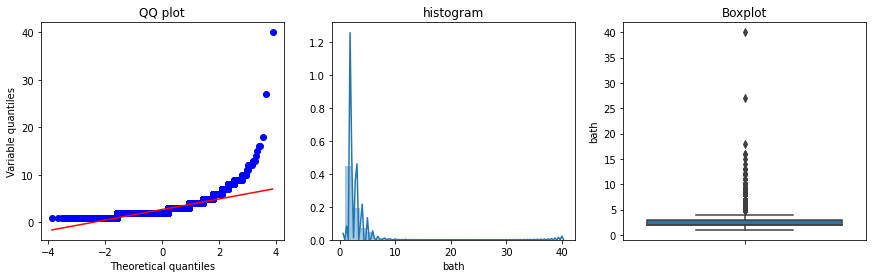

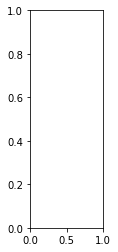

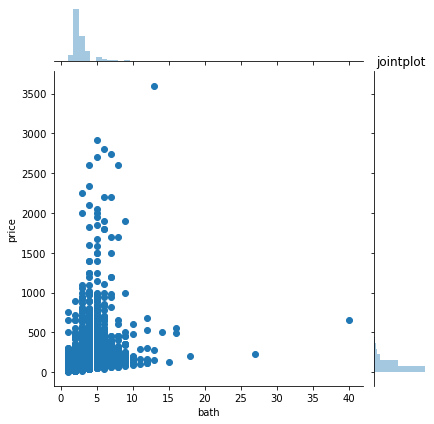

********************************************balcony**********************************************


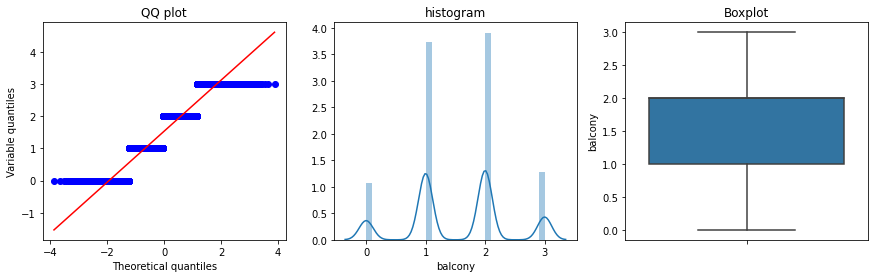

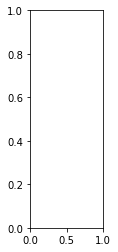

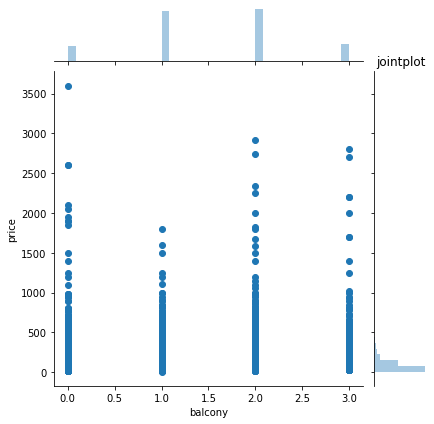

********************************************price**********************************************


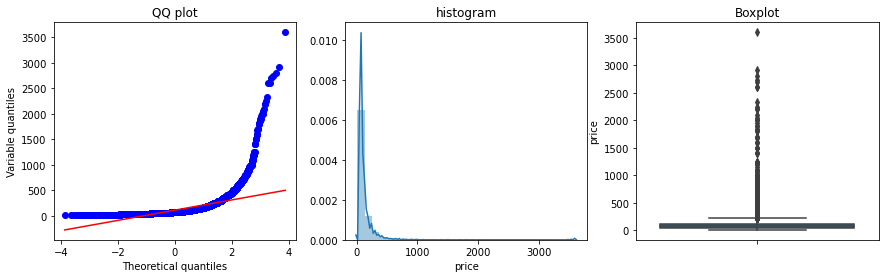

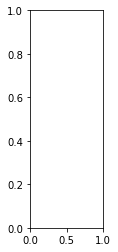

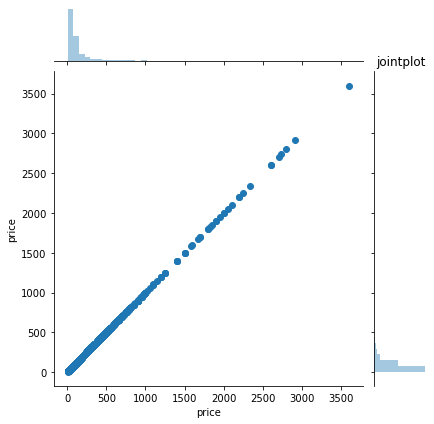

********************************************bhk**********************************************


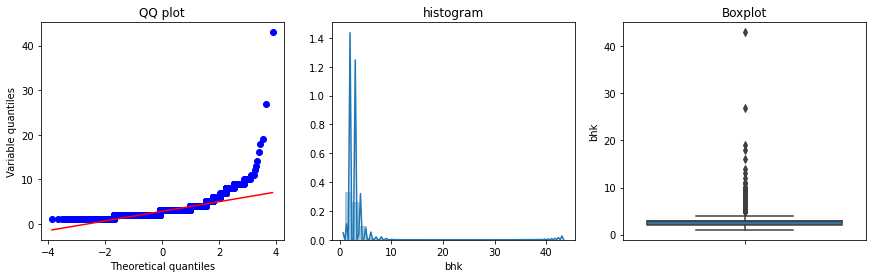

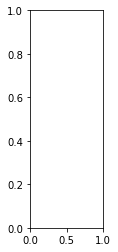

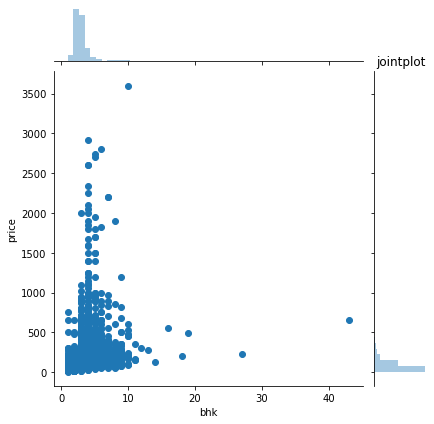

********************************************sqft_area**********************************************


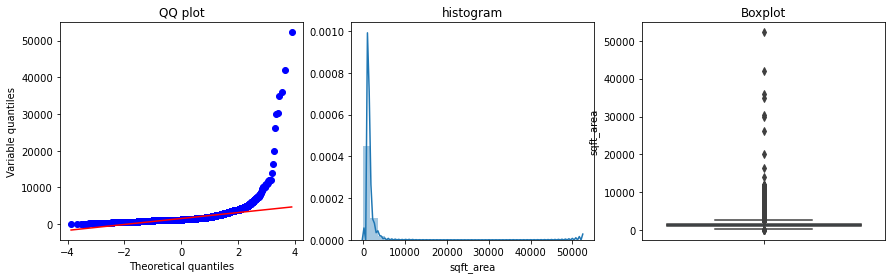

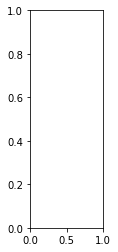

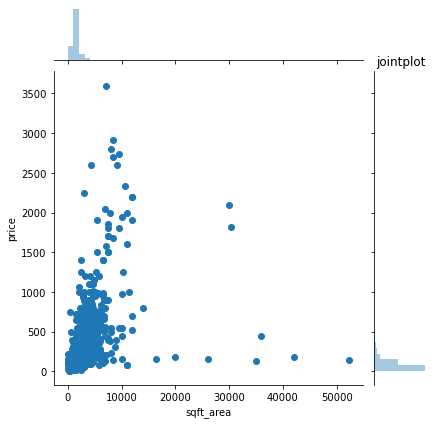

********************************************price_per_sqft**********************************************


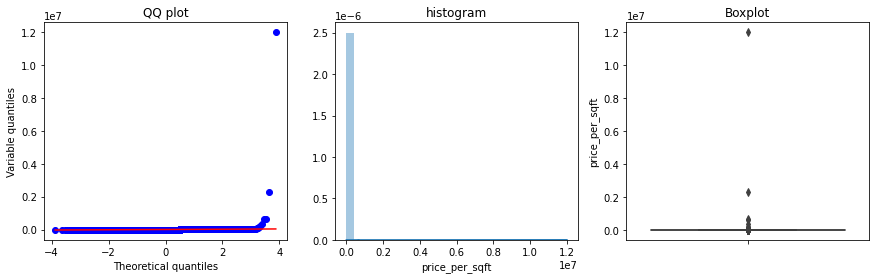

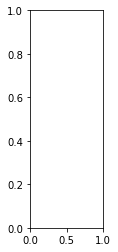

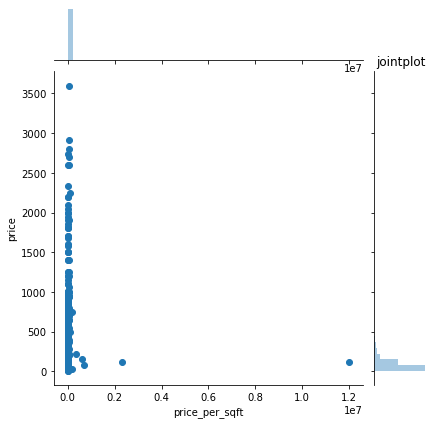

In [54]:
for col in df7.drop(['location'],axis=1).columns: # all numerical columns
    print(f"********************************************{col}**********************************************")
    plots(df7,col)

In [55]:
# Observations
#Many potential outliers in bhk,price_per_sqft,bathrooms 


In [56]:
#Assuming 1bhk requires 300 sqft
df7[df7['sqft_area']/df7['bhk'] < 300]

,location,bath,balcony,price,bhk,sqft_area,price_per_sqft
9,other,6.0,0.0,370.00,6,1020.0,3.627451e+04
45,hsr layout,9.0,0.0,200.00,8,600.0,3.333333e+04
58,murugeshpalya,4.0,1.0,150.00,6,1407.0,1.066098e+04
68,devarachikkanahalli,7.0,0.0,85.00,8,1350.0,6.296296e+03
70,other,3.0,2.0,100.00,3,500.0,2.000000e+04
78,kaval byrasandra,1.0,0.0,22.00,2,460.0,4.782609e+03
89,rajaji nagar,6.0,3.0,160.00,6,710.0,2.253521e+04
119,hennur road,3.0,3.0,23.00,2,276.0,8.333333e+03
129,vishwapriya layout,7.0,0.0,115.00,7,950.0,1.210526e+04
149,other,5.0,0.0,185.00,6,1034.0,1.789168e+04


In [57]:
len(df7[df7['sqft_area']/df7['bhk'] < 300])
#there seems to be alot of outliers, let's drop them
len(df7['location'].value_counts())

247

In [58]:
df8=df7.drop(df7[df7['sqft_area']/df7['bhk'] < 300].index)
df8.shape

(12312, 7)

In [59]:
#using price_per_sqft
df8['price_per_sqft'].describe(percentiles=[.05,.25,.5,.75,.95],include='all')

count     12312.000000
mean       6323.403514
std        4187.211055
min         267.829813
5%         3091.940019
25%        4208.545855
50%        5300.000000
75%        6938.987948
95%       13402.435065
max      176470.588235
Name: price_per_sqft, dtype: float64

In [60]:
#there seems to be a lot of outliers by looking at min, max and pecentiles values.
def pps_outliers(df):
    df_renewed=pd.DataFrame()
    for key, df_sub in df.groupby('location'):  
        m = np.mean(df_sub.price_per_sqft)
        st = np.std(df_sub.price_per_sqft)
        reduced_df = df_sub[(df_sub.price_per_sqft>(m-st)) & (df_sub.price_per_sqft<=(m+st))]
        df_renewed = pd.concat([df_renewed,reduced_df],ignore_index=True)
    return df_renewed
df9=pps_outliers(df8)
df9.shape

(10151, 7)

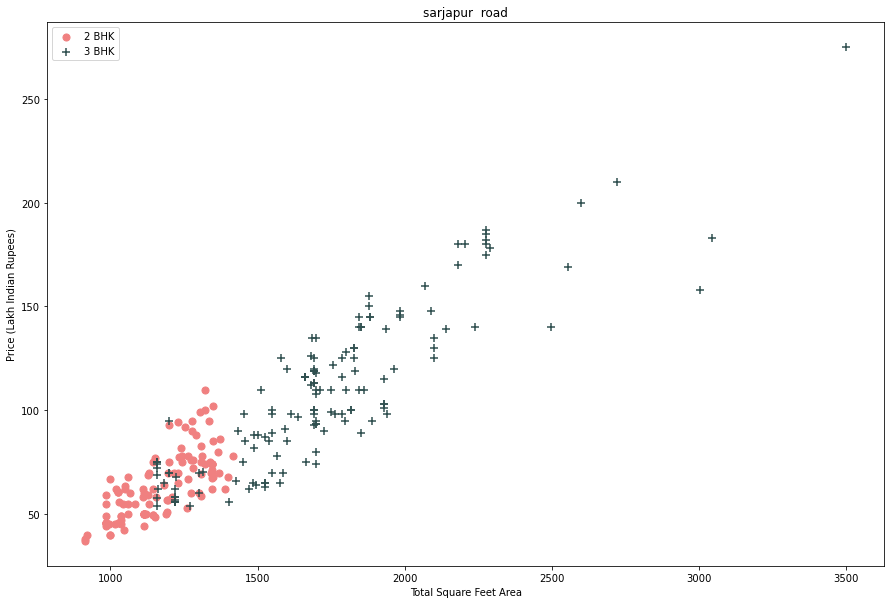

In [61]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.sqft_area,bhk2.price,color='lightcoral',label='2 BHK', s=50)
    plt.scatter(bhk3.sqft_area,bhk3.price,marker='+', color='darkslategray',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df9,"sarjapur  road")

In [62]:
#using bhk
#For each location,remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment
def bhk_outliers(df):
    exclude=np.array([])
    for key, subdf in df.groupby('location'): 
        bhk_stats={}
        for i, bhkdf in subdf.groupby('bhk'):
            bhk_stats[i]={
                "mean":np.mean(bhkdf['price_per_sqft']),
                "std":np.std(bhkdf['price_per_sqft']),
                "count":len(bhkdf)}
        for i, bhkdf in subdf.groupby('bhk'):
            stats=bhk_stats.get(i-1)
            if stats and stats["count"]>5:
                exclude=np.append(exclude,bhkdf[bhkdf['price_per_sqft']<stats['mean']].index.values)
    return df.drop(exclude)
            
            

In [63]:
df10=bhk_outliers(df9)
df10.shape

(7218, 7)

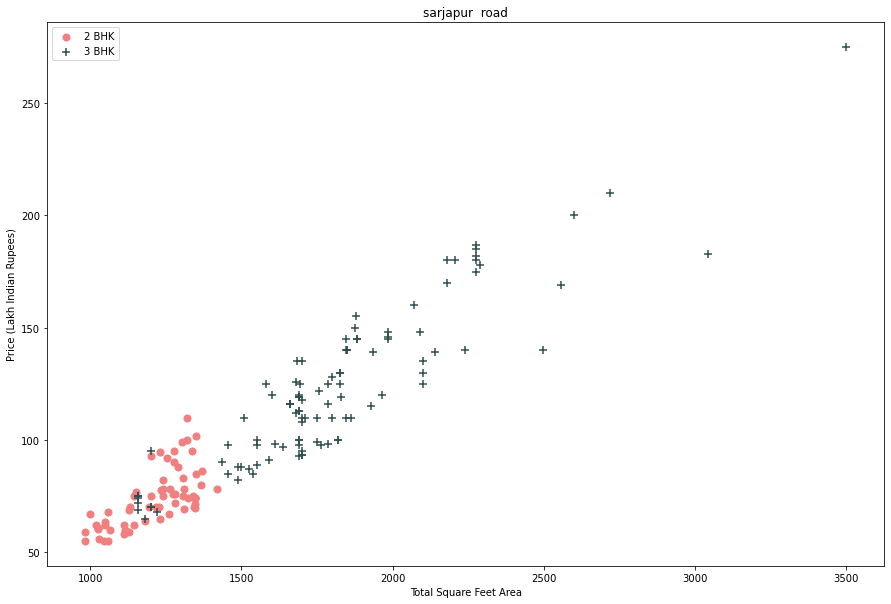

In [64]:
plot_scatter_chart(df10,"sarjapur  road")

In [65]:
#using bathroom to detect outliers.

In [66]:
df10[df10['bath']>10]

,location,bath,balcony,price,bhk,sqft_area,price_per_sqft
164,7th phase jp nagar,12.0,0.0,525.0,10,12000.0,4375.000000
1537,btm 1st stage,14.0,0.0,500.0,9,3300.0,15151.515152
5450,neeladri nagar,12.0,0.0,160.0,10,4000.0,4000.000000
6131,other,16.0,0.0,550.0,16,10000.0,5500.000000
6747,other,12.0,0.0,150.0,11,6000.0,2500.000000
7025,other,13.0,0.0,275.0,13,5425.0,5069.124424


In [67]:
#It's odd to have 2 more bathrooms than number of bedrooms in an apartment
df10[df10.bath > df10.bhk+2]

,location,bath,balcony,price,bhk,sqft_area,price_per_sqft
1537,btm 1st stage,14.0,0.0,500.0,9,3300.0,15151.515152
1767,chikkabanavar,7.0,2.0,80.0,4,2460.0,3252.032520
5397,nagasandra,8.0,0.0,450.0,4,7000.0,6428.571429
5990,other,9.0,1.0,1000.0,6,11338.0,8819.897689
8933,thanisandra,6.0,2.0,116.0,3,1806.0,6423.034330


In [68]:
df11 = df10[df10.bath < df10.bhk+2]
df11.shape

(7146, 7)

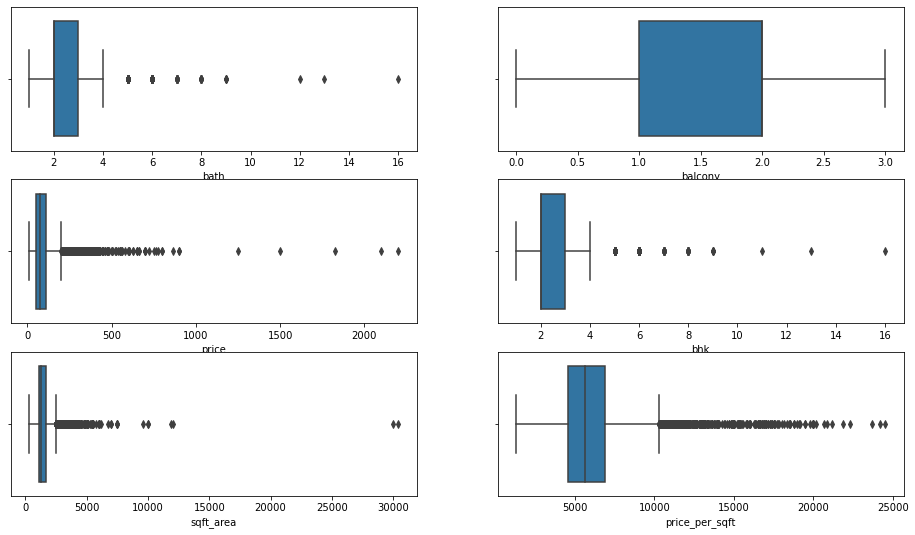

In [69]:
plt.figure(figsize=(16,9))
for i,var in enumerate(df11.drop(['location'],axis=1),start=1):
    plt.subplot(3,2,i)
    sns.boxplot(df11[var])

In [70]:
df11.drop("location",axis=1).to_csv("clean_numeric_data.csv",index=False)

In [71]:
df_dummies=pd.get_dummies(df11['location'])

In [72]:
df_dummies.head(2)

,1st block jayanagar,1st block koramangala,1st phase jp nagar,2nd block hrbr layout,2nd phase judicial layout,2nd stage nagarbhavi,4th t block jayanagar,5th block hbr layout,7th phase jp nagar,abbigere,aecs layout,ags layout,akshaya nagar,akshayanagara east,ambalipura,ambedkar nagar,amruthahalli,anandapura,ananth nagar,anekal,ardendale,arekere,ashwath nagar,attibele,babusapalaya,badavala nagar,balagere,banagiri nagar,banashankari,banashankari stage iii,banashankari stage vi,banaswadi,banjara layout,bannerghatta,bannerghatta road,basapura,basavangudi,basaveshwara nagar,battarahalli,begur,begur road,bellandur,beml layout,benson town,bharathi nagar,bhoganhalli,billekahalli,binny pete,bisuvanahalli,bommanahalli,bommasandra,bommasandra industrial area,brookefield,btm 1st stage,btm 2nd stage,btm layout,budigere,chamrajpet,chandapura,channasandra,chikka tirupathi,chikkabanavar,chikkalasandra,choodasandra,cooke town,cox town,cunningham road,cv raman nagar,dairy circle,dasanapura,dasarahalli,devanahalli,devarachikkanahalli,dodda nekkundi,doddaballapur,doddakallasandra,doddathoguru,dodsworth layout,domlur,electronic city,electronic city phase ii,electronics city phase 1,epip zone,frazer town,ganga nagar,garudachar palya,giri nagar,gm palaya,gollarapalya hosahalli,gottigere,green glen layout,gubbalala,gunjur,gunjur palya,hal 2nd stage,haralur road,harlur,hebbal,hebbal kempapura,hegde nagar,hennur,hennur road,hoodi,horamavu agara,horamavu banaswadi,hormavu,hosa road,hosakerehalli,hoskote,hosur road,hrbr layout,hsr layout,hulimavu,iblur village,indira nagar,isro layout,itpl,jakkur,jalahalli,jalahalli east,jigani,jp nagar,judicial layout,kadubeesanahalli,kadugodi,kaggadasapura,kaggalipura,kaikondrahalli,kalena agrahara,kalkere,kalyan nagar,kambipura,kammanahalli,kammasandra,kanakapura,kanakpura road,kannamangala,karuna nagar,kasavanhalli,kasturi nagar,kathriguppe,kaval byrasandra,kenchenahalli,kengeri,kengeri satellite town,kereguddadahalli,kodichikkanahalli,kodigehaali,kodihalli,kogilu,konanakunte,koramangala,kothanur,kr puram,kudlu,kudlu gate,kumaraswami layout,kundalahalli,laggere,lakshminarayana pura,lb shastri nagar,lingadheeranahalli,magadi road,mahadevpura,mahalakshmi layout,mallasandra,malleshpalya,malleshwaram,marathahalli,marsur,mico layout,munnekollal,murugeshpalya,mysore road,nagadevanahalli,naganathapura,nagappa reddy layout,nagarbhavi,nagasandra,nagavara,nagavarapalya,narayanapura,neeladri nagar,nehru nagar,nelamangala,nri layout,old airport road,old madras road,ombr layout,other,padmanabhanagar,pai layout,panathur,parappana agrahara,pattandur agrahara,poorna pragna layout,prithvi layout,r.t. nagar,rachenahalli,raja rajeshwari nagar,rajaji nagar,rajiv nagar,ramagondanahalli,ramamurthy nagar,rayasandra,sadashiva nagar,sahakara nagar,sanjay nagar,sarakki nagar,sarjapur,sarjapur road,sarjapura - attibele road,sector 2 hsr layout,seegehalli,shampura,shivaji nagar,singasandra,somasundara palya,sompura,sonnenahalli,srirampura,subramanyapura,sultan palaya,talaghattapura,tc palaya,thanisandra,thigalarapalya,thubarahalli,thyagaraja nagar,tindlu,tumkur road,ulsoor,uttarahalli,varthur,varthur road,vasanthapura,vidyaranyapura,vijayanagar,vishveshwarya layout,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli,yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [73]:
df12 = pd.concat([df11,df_dummies.drop('other',axis='columns')],axis='columns')
df12.head()

,location,bath,balcony,price,bhk,sqft_area,price_per_sqft,1st block jayanagar,1st block koramangala,1st phase jp nagar,2nd block hrbr layout,2nd phase judicial layout,2nd stage nagarbhavi,4th t block jayanagar,5th block hbr layout,7th phase jp nagar,abbigere,aecs layout,ags layout,akshaya nagar,akshayanagara east,ambalipura,ambedkar nagar,amruthahalli,anandapura,ananth nagar,anekal,ardendale,arekere,ashwath nagar,attibele,babusapalaya,badavala nagar,balagere,banagiri nagar,banashankari,banashankari stage iii,banashankari stage vi,banaswadi,banjara layout,bannerghatta,bannerghatta road,basapura,basavangudi,basaveshwara nagar,battarahalli,begur,begur road,bellandur,beml layout,benson town,bharathi nagar,bhoganhalli,billekahalli,binny pete,bisuvanahalli,bommanahalli,bommasandra,bommasandra industrial area,brookefield,btm 1st stage,btm 2nd stage,btm layout,budigere,chamrajpet,chandapura,channasandra,chikka tirupathi,chikkabanavar,chikkalasandra,choodasandra,cooke town,cox town,cunningham road,cv raman nagar,dairy circle,dasanapura,dasarahalli,devanahalli,devarachikkanahalli,dodda nekkundi,doddaballapur,doddakallasandra,doddathoguru,dodsworth layout,domlur,electronic city,electronic city phase ii,electronics city phase 1,epip zone,frazer town,ganga nagar,garudachar palya,giri nagar,gm palaya,gollarapalya hosahalli,gottigere,green glen layout,gubbalala,gunjur,gunjur palya,hal 2nd stage,haralur road,harlur,hebbal,hebbal kempapura,hegde nagar,hennur,hennur road,hoodi,horamavu agara,horamavu banaswadi,hormavu,hosa road,hosakerehalli,hoskote,hosur road,hrbr layout,hsr layout,hulimavu,iblur village,indira nagar,isro layout,itpl,jakkur,jalahalli,jalahalli east,jigani,jp nagar,judicial layout,kadubeesanahalli,kadugodi,kaggadasapura,kaggalipura,kaikondrahalli,kalena agrahara,kalkere,kalyan nagar,kambipura,kammanahalli,kammasandra,kanakapura,kanakpura road,kannamangala,karuna nagar,kasavanhalli,kasturi nagar,kathriguppe,kaval byrasandra,kenchenahalli,kengeri,kengeri satellite town,kereguddadahalli,kodichikkanahalli,kodigehaali,kodihalli,kogilu,konanakunte,koramangala,kothanur,kr puram,kudlu,kudlu gate,kumaraswami layout,kundalahalli,laggere,lakshminarayana pura,lb shastri nagar,lingadheeranahalli,magadi road,mahadevpura,mahalakshmi layout,mallasandra,malleshpalya,malleshwaram,marathahalli,marsur,mico layout,munnekollal,murugeshpalya,mysore road,nagadevanahalli,naganathapura,nagappa reddy layout,nagarbhavi,nagasandra,nagavara,nagavarapalya,narayanapura,neeladri nagar,nehru nagar,nelamangala,nri layout,old airport road,old madras road,ombr layout,padmanabhanagar,pai layout,panathur,parappana agrahara,pattandur agrahara,poorna pragna layout,prithvi layout,r.t. nagar,rachenahalli,raja rajeshwari nagar,rajaji nagar,rajiv nagar,ramagondanahalli,ramamurthy nagar,rayasandra,sadashiva nagar,sahakara nagar,sanjay nagar,sarakki nagar,sarjapur,sarjapur road,sarjapura - attibele road,sector 2 hsr layout,seegehalli,shampura,shivaji nagar,singasandra,somasundara palya,sompura,sonnenahalli,srirampura,subramanyapura,sultan palaya,talaghattapura,tc palaya,thanisandra,thigalarapalya,thubarahalli,thyagaraja nagar,tindlu,tumkur road,ulsoor,uttarahalli,varthur,varthur road,vasanthapura,vidyaranyapura,vijayanagar,vishveshwarya layout,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli,yeshwanthpur
0,1st block jayanagar,4.0,1.0,428.0,4,2850.0,15017.543860,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1st block jayanagar,3.0,2.0,194.0,3,1630.0,11901.840491,1,0,0,0,0,0,0,0,0,0,0,0,0

In [74]:
df12.drop("location",axis=1,inplace=True)

In [75]:
df12.head(2)

,bath,balcony,price,bhk,sqft_area,price_per_sqft,1st block jayanagar,1st block koramangala,1st phase jp nagar,2nd block hrbr layout,2nd phase judicial layout,2nd stage nagarbhavi,4th t block jayanagar,5th block hbr layout,7th phase jp nagar,abbigere,aecs layout,ags layout,akshaya nagar,akshayanagara east,ambalipura,ambedkar nagar,amruthahalli,anandapura,ananth nagar,anekal,ardendale,arekere,ashwath nagar,attibele,babusapalaya,badavala nagar,balagere,banagiri nagar,banashankari,banashankari stage iii,banashankari stage vi,banaswadi,banjara layout,bannerghatta,bannerghatta road,basapura,basavangudi,basaveshwara nagar,battarahalli,begur,begur road,bellandur,beml layout,benson town,bharathi nagar,bhoganhalli,billekahalli,binny pete,bisuvanahalli,bommanahalli,bommasandra,bommasandra industrial area,brookefield,btm 1st stage,btm 2nd stage,btm layout,budigere,chamrajpet,chandapura,channasandra,chikka tirupathi,chikkabanavar,chikkalasandra,choodasandra,cooke town,cox town,cunningham road,cv raman nagar,dairy circle,dasanapura,dasarahalli,devanahalli,devarachikkanahalli,dodda nekkundi,doddaballapur,doddakallasandra,doddathoguru,dodsworth layout,domlur,electronic city,electronic city phase ii,electronics city phase 1,epip zone,frazer town,ganga nagar,garudachar palya,giri nagar,gm palaya,gollarapalya hosahalli,gottigere,green glen layout,gubbalala,gunjur,gunjur palya,hal 2nd stage,haralur road,harlur,hebbal,hebbal kempapura,hegde nagar,hennur,hennur road,hoodi,horamavu agara,horamavu banaswadi,hormavu,hosa road,hosakerehalli,hoskote,hosur road,hrbr layout,hsr layout,hulimavu,iblur village,indira nagar,isro layout,itpl,jakkur,jalahalli,jalahalli east,jigani,jp nagar,judicial layout,kadubeesanahalli,kadugodi,kaggadasapura,kaggalipura,kaikondrahalli,kalena agrahara,kalkere,kalyan nagar,kambipura,kammanahalli,kammasandra,kanakapura,kanakpura road,kannamangala,karuna nagar,kasavanhalli,kasturi nagar,kathriguppe,kaval byrasandra,kenchenahalli,kengeri,kengeri satellite town,kereguddadahalli,kodichikkanahalli,kodigehaali,kodihalli,kogilu,konanakunte,koramangala,kothanur,kr puram,kudlu,kudlu gate,kumaraswami layout,kundalahalli,laggere,lakshminarayana pura,lb shastri nagar,lingadheeranahalli,magadi road,mahadevpura,mahalakshmi layout,mallasandra,malleshpalya,malleshwaram,marathahalli,marsur,mico layout,munnekollal,murugeshpalya,mysore road,nagadevanahalli,naganathapura,nagappa reddy layout,nagarbhavi,nagasandra,nagavara,nagavarapalya,narayanapura,neeladri nagar,nehru nagar,nelamangala,nri layout,old airport road,old madras road,ombr layout,padmanabhanagar,pai layout,panathur,parappana agrahara,pattandur agrahara,poorna pragna layout,prithvi layout,r.t. nagar,rachenahalli,raja rajeshwari nagar,rajaji nagar,rajiv nagar,ramagondanahalli,ramamurthy nagar,rayasandra,sadashiva nagar,sahakara nagar,sanjay nagar,sarakki nagar,sarjapur,sarjapur road,sarjapura - attibele road,sector 2 hsr layout,seegehalli,shampura,shivaji nagar,singasandra,somasundara palya,sompura,sonnenahalli,srirampura,subramanyapura,sultan palaya,talaghattapura,tc palaya,thanisandra,thigalarapalya,thubarahalli,thyagaraja nagar,tindlu,tumkur road,ulsoor,uttarahalli,varthur,varthur road,vasanthapura,vidyaranyapura,vijayanagar,vishveshwarya layout,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli,yeshwanthpur
0,4.0,1.0,428.0,4,2850.0,15017.543860,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.0,2.0,194.0,3,1630.0,11901.840491,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [76]:
df12.to_csv("one_hot_encoded_data.csv",index=False)

In [77]:
df11.to_csv("FinalData.csv",index=False)

### splitting data into training and test set

In [78]:
X=df11.drop("price",axis=1)
y=df11['price']

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)


Shape of X_train =  (5716, 6)
Shape of y_train =  (5716,)
Shape of X_test =  (1430, 6)
Shape of y_test =  (1430,)


### Training different models

In [80]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, AdaBoostRegressor 
import xgboost
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.compose import ColumnTransformer

In [126]:
models={
    "Name":[],
    "R2 Score":[],
    "Mean_Squared_Error":[],
    "Hyperparameter_Tuning":[]
}
def model_score(name,r2,mse,ht):
    models["Name"].append(name)
    models["R2 Score"].append(r2)
    models["Mean_Squared_Error"].append(mse)
    models["Hyperparameter_Tuning"].append(ht)

In [82]:
#OrdinaryLeastSquaresRegression
ct=ColumnTransformer(remainder='passthrough', transformers=[
    ("ohe",OneHotEncoder(sparse=False,handle_unknown="ignore"),['location'])
])
pipeline_OLS=Pipeline(
    [
        ('ct',ct),
        ('scale',StandardScaler()),
        ('ols',LinearRegression())
    ]
)
pipeline_OLS.fit(X_train,y_train)
mse_ols=mean_squared_error(y_test,pipeline_OLS.predict(X_test))
r2_ols=r2_score(y_test,pipeline_OLS.predict(X_test))
r2_ols

0.9381028521614994

In [ ]:
model_score("LinearRegression",r2_ols,mse_ols,"-")

In [128]:
a={'location':['marsur'],
   'bath':[3],
   'balcony':[1],
   'bhk':[3],
   'sqft_area':[1200],
   'price_per_sqft':[10000]}
b=pd.DataFrame(a)

In [129]:
pipeline_OLS.predict(b)

array([138.36163611])

In [130]:
X_test.head()

,location,bath,balcony,bhk,sqft_area,price_per_sqft
5270,marsur,3.0,1.0,3,1200.0,10000.000000
9181,uttarahalli,2.0,1.0,2,1125.0,4177.777778
2474,electronics city phase 1,2.0,2.0,3,1124.0,4893.238434
3884,jp nagar,2.0,0.0,4,1500.0,5800.000000
9864,yelachenahalli,2.0,3.0,3,1464.0,7172.131148


In [131]:
y_test.head()

5270    120.0
9181     47.0
2474     55.0
3884     87.0
9864    105.0
Name: price, dtype: float64

In [132]:
#RidgeRegression
pipeline_RR=Pipeline(
    [
        ('ct',ct),
        ('scale',StandardScaler()),
        ('ridge',Ridge())
    ]
)
params_rr={
    "ridge__alpha": [0.1,0.2,0.3,0.5,0.8,1,2,3]
}
final_rr=GridSearchCV(pipeline_RR,params_rr,n_jobs=-1, cv=6, scoring="r2")
final_rr.fit(X_train,y_train)
mse_rr=mean_squared_error(y_test,final_rr.predict(X_test))
r2_rr=r2_score(y_test,final_rr.predict(X_test))
model_score("RidgeRegression",r2_rr,mse_rr,"Yes")
r2_rr

0.9380969450083962

In [133]:
#LassoRegression
pipeline_LR=Pipeline(
    [
        ('ct',ct),
        ('scale',StandardScaler()),
        ('lasso',Lasso())
    ]
)
params_lr={
    "lasso__alpha": [0.1,0.2,0.3,0.5,0.8,1,2,3]
}
final_lr=GridSearchCV(pipeline_LR,params_lr,n_jobs=-1, cv=6, scoring="r2")
final_lr.fit(X_train,y_train)
mse_lr=mean_squared_error(y_test,final_lr.predict(X_test))
r2_lr=r2_score(y_test,final_lr.predict(X_test))
model_score("LassoRegression",r2_lr,mse_lr,"Yes")
r2_lr

0.9382016979928869

In [89]:
final_lr.predict(b)

array([142.59815407])

In [96]:
#RandomForestRegressor
pipeline_RFR_=Pipeline(
    [
        ('ct',ct),
        ('scale',StandardScaler()),
        ('rfr',RandomForestRegressor()
    ]
)
pipeline_RFR_.fit(X_train,y_train)
mse_rfr=mean_squared_error(y_test,pipeline_RFR_.predict(X_test))
r2_rfr=r2_score(y_test,pipeline_RFR_.predict(X_test))
r2_rfr

0.9187629416535269

In [86]:
model_score("RandomForestRegressor",r2_rfr,mse_rfr,"No")

NameError: name 'model_score' is not defined

In [93]:
#AdaBoostRegressor
pipeline_ABR=Pipeline(
    [
        ('ct',ct),
        ('scale',StandardScaler()),
        ('abr',AdaBoostRegressor(DecisionTreeRegressor()))
    ]
)
pipeline_ABR.fit(X_train,y_train)
mse_abr=mean_squared_error(y_test,pipeline_ABR.predict(X_test))
r2_abr=r2_score(y_test,pipeline_ABR.predict(X_test))
r2_abr

0.7877709866672905

In [135]:
model_score("AdaBoostingRegressor",r2_abr,mse_abr,"No")

In [95]:
#GradientBoostingRegressor
pipeline_GBR=Pipeline(
    [
        ('ct',ct),
        ('scale',StandardScaler()),
        ('gbr',GradientBoostingRegressor())
    ]
)
pipeline_GBR.fit(X_train,y_train)
mse_gbr=mean_squared_error(y_test,pipeline_GBR.predict(X_test))
r2_gbr=r2_score(y_test,pipeline_GBR.predict(X_test))
r2_gbr

0.9196118330527627

In [136]:
model_score("GradientBoostingRegressor",r2_gbr,mse_gbr,"No")

In [97]:
#XGBoostRegressor
pipeline_XGR=Pipeline(
    [
        ('ct',ct),
        ('scale',StandardScaler()),
        ('xgr',xgboost.XGBRegressor())
    ]
)
pipeline_XGR.fit(X_train,y_train)
mse_xgb=mean_squared_error(y_test,pipeline_XGR.predict(X_test))
r2_xgb=r2_score(y_test,pipeline_XGR.predict(X_test))
r2_xgb

0.7500612868676318

In [137]:
model_score("XGBoostRegressor",r2_xgb,mse_xgb,"No")

### Hyperparameter tuning 

In [138]:
pipeline_RFR=Pipeline(
    [
        ('ct',ct),
        ('scale',StandardScaler()),
        ('rfr',RandomForestRegressor())
    ]
)
params_rfr={
    'rfr__max_depth': [1,5,10,20,50,80,100,150],
    'rfr__min_samples_leaf': [1,2, 4,5,10,40,100,200,500,700],
    'rfr__min_samples_split': [2,4, 5,10,40,100,200,500,700],
    'rfr__n_estimators': [100,200, 800, 1000,1200, 1400,1600]
}
final_rfr=RandomizedSearchCV(pipeline_RFR,params_rfr,n_iter=25,n_jobs=-1, cv=3, scoring="r2")
final_rfr.fit(X_train,y_train)
mse_final_rfr=mean_squared_error(y_test,final_rfr.predict(X_test))
r2_final_rfr=r2_score(y_test,final_rfr.predict(X_test))
r2_final_rfr

0.9204808833278826

In [139]:
model_score("RandomForestRegressor",r2_final_rfr,mse_final_rfr,"Yes")

In [140]:
final_rfr.best_estimator_

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['location'])])),
                ('scale', StandardScaler()),
                ('rfr',
                 RandomForestRegressor(max_depth=100, min_samples_split=5))])

In [111]:
pipeline_XGR=Pipeline(
    [
        ("ct",ct),
        ('scale',StandardScaler()),
        ('xgr',xgboost.XGBRegressor(verbose=3))
    ]
)
params_xgr={
    'xgr__max_depth': [5,10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'xgr__subsample': [0.9,0.8],
    'xgr__gamma':[0.1,0.2,2,1,3],
    'xgr__learning_rate':[0.01,0.1,0.2,0.3],
    'xgr__colsample_bytree':[0.8,0.9],
    "xgr__reg_alpha":[1e-2,0.1,1],
    "xgr__eta":[0.01,0.25,0.05,0.1,0.2,0.3],
    'xgr__n_estimators':[800,1000,1400,1600]
    
}
final_xgr=RandomizedSearchCV(pipeline_XGR,params_xgr,n_iter=25,n_jobs=-1, cv=3, scoring="r2")
final_xgr.fit(X_train,y_train)
mse_final_xgb=mean_squared_error(y_test,final_xgr.predict(X_test))
r2_final_xgb=r2_score(y_test,final_xgr.predict(X_test))
r2_final_xgb

0.8662645141217096

In [112]:
final_xgr.best_params_

{'xgr__subsample': 0.8,
 'xgr__reg_alpha': 1,
 'xgr__n_estimators': 800,
 'xgr__max_depth': 30,
 'xgr__learning_rate': 0.2,
 'xgr__gamma': 3,
 'xgr__eta': 0.25,
 'xgr__colsample_bytree': 0.9}

In [150]:
model_score("XGBoostRegressor",r2_final_xgb,mse_final_xgb,"Yes")

In [151]:
models

{'Name': ['LinearRegression',
  'RidgeRegression',
  'LassoRegression',
  'RandomForestRegressor',
  'AdaBoostingRegressor',
  'GradientBoostingRegressor',
  'XGBoostRegressor',
  'RandomForestRegressor',
  'AdaBoostingRegressor',
  'XGBoostRegressor'],
 'R2 Score': [0.9381028521614994,
  0.9380969450083962,
  0.9382016979928869,
  0.9477279511760154,
  0.7877709866672905,
  0.9196118330527627,
  0.7500612868676318,
  0.9204808833278826,
  0.7852884895122139,
  0.8662645141217096],
 'Mean_Squared_Error': [463.52641368395865,
  463.5706503182557,
  462.7861913097355,
  391.44736346354546,
  1589.3099579720279,
  601.9992847635357,
  1871.7049070065307,
  595.4912666818562,
  1607.9005238293705,
  1001.4989755777939],
 'Hyperparameter_Tuning': ['-',
  'Yes',
  'Yes',
  'No',
  'No',
  'No',
  'No',
  'Yes',
  'Yes',
  'Yes']}

In [152]:
models_df=pd.DataFrame(models,index=models['Name'])

In [153]:
models_df.drop('Name',axis=1)

,R2 Score,Mean_Squared_Error,Hyperparameter_Tuning
LinearRegression,0.938103,463.526414,-
RidgeRegression,0.938097,463.570650,Yes
LassoRegression,0.938202,462.786191,Yes
RandomForestRegressor,0.947728,391.447363,No
AdaBoostingRegressor,0.787771,1589.309958,No
GradientBoostingRegressor,0.919612,601.999285,No
XGBoostRegressor,0.750061,1871.704907,No
RandomForestRegressor,0.920481,595.491267,Yes
AdaBoostingRegressor,0.785288,1607.900524,Yes
XGBoostRegressor,0.866265,1001.498976,Yes


In [88]:
#Saving best three models
import pickle

In [97]:
pickle.dump(pipeline_RFR_, open('randomforest.sav', 'wb'))

In [156]:
pickle.dump(final_lr, open('lasso.sav', 'wb'))

In [157]:
pickle.dump(pipeline_OLS, open('ols.sav', 'wb'))

In [ ]:
pickle.dump(pipeline_OLS, open('ols.sav', 'wb'))

In [93]:
a1=pickle.load(open('randomforest.sav', 'rb'))

FileNotFoundError: [Errno 2] No such file or directory: 'randomforest.sav'

In [159]:
a2=pickle.load(open('lasso.sav', 'rb'))

In [160]:
a3=pickle.load(open('ols.sav', 'rb'))

In [161]:
a={'location':['uttarahalli','jp nagar'],
   'bath':[2,2],
   'balcony':[1,0],
   'bhk':[2,4],
   'sqft_area':[1125,1500],
   'price_per_sqft':[4177,5800]}
b=pd.DataFrame(a)
("Real values: 47.0,87.0")

'Real values: 47.0,87.0'

In [162]:
a1.predict(b)

array([47.0411, 87.38  ])

In [163]:
a2.predict(b)

array([44.00672865, 84.21241107])

In [164]:
a3.predict(b)

array([45.20929236, 81.03351111])

Text(0.5, 1.0, 'Ordinaryleastsquares')

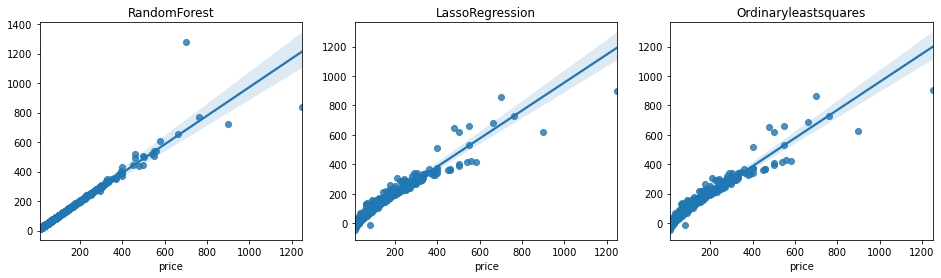

In [165]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
sns.regplot(y_test,a1.predict(X_test))
plt.title("RandomForest")

plt.subplot(1,3,2)
sns.regplot(y_test,a2.predict(X_test))
plt.title("LassoRegression")

plt.subplot(1,3,3)
sns.regplot(y_test,a3.predict(X_test))
plt.title("Ordinaryleastsquares")

if random forest is predicting price to be more than 1000, we'll use average of lasso and ols.